In [1]:
import numpy as np
import matplotlib.pyplot as plt

loss = lambda x: x**2 -4*x + 6 #(2,2)가 꼭지점
dloss_dx = lambda x: 2*x - 4

step = 1000
step_size = 0.005
start_point = np.random.rand()
x = start_point
for i in range(step):
    x -= step_size * dloss_dx(x)
    if i % 100 == 0:
      print(f"step {i}: {x} || {loss(x)}")

step 0: 0.31161049444480815 || 4.8506591224689055
step 100: 1.381994836300483 || 2.3819303823592666
step 200: 1.7737901230121194 || 2.051170908446872
step 300: 1.9171998691069971 || 2.0068558616758985
step 400: 1.9696924742315045 || 2.000918546118208
step 500: 1.9889064653847586 || 2.0001230665102594
step 600: 1.9959394075517873 || 2.0000164884110303
step 700: 1.9985136918392241 || 2.000002209111949
step 800: 1.9994559631440576 || 2.0000002959761005
step 900: 1.9998008649158803 || 2.0000000396547817


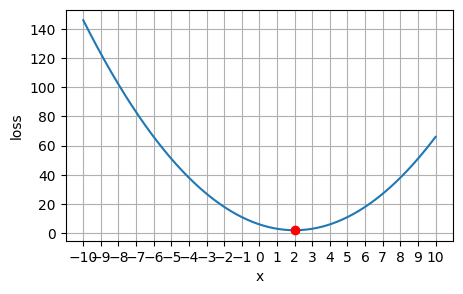

In [2]:
#visualize
fig = plt.figure(figsize=(5, 3))
ax = np.linspace(-10, 10, 400)
plt.plot(ax, loss(ax))
plt.plot(x, loss(x), "ro")
plt.xticks(np.arange(-10, 11, 1))
plt.xlabel("x")
plt.ylabel("loss")
plt.grid()
plt.show()


step 0: a=0.6688929802507148, b=0.22318841283633095 || loss=2008.2613378131143
step 100: a=3.1340546175929247, b=0.8509518134086336 || loss=118.18778312704933
step 200: a=3.1023574641476728, b=1.0890842903139861 || loss=112.41607687069144
step 300: a=3.0666234435166833, b=1.3132507780882354 || loss=107.27061620664685
step 400: a=3.0328405618979417, b=1.52508650204672 || loss=102.67556579327423
step 500: a=3.0009156256387155, b=1.7252717481770419 || loss=98.57205071252321
step 600: a=2.970746486611684, b=1.9144472708859206 || loss=94.90749113733564
step 700: a=2.942236580133231, b=2.09321857939327 || loss=91.63493173014935
step 800: a=2.915294652268602, b=2.2621578813061114 || loss=88.71243999442282
step 900: a=2.889834467837219, b=2.421805914142576 || loss=86.10256897828934
step 1000: a=2.865774534393071, b=2.5726736761136872 || loss=83.77187745311396
step 1100: a=2.84303784138533, b=2.7152440617161644 || loss=81.69050141884068
step 1200: a=2.82155161366453, b=2.849973407371411 || loss

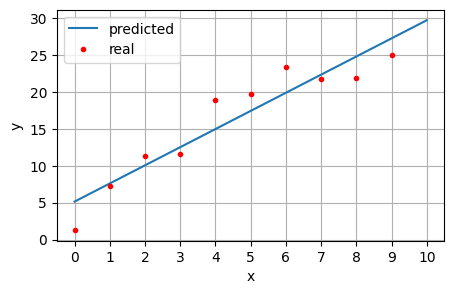

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# find best fit line for data by gradient descent
# y = ax + b
test_data = [3*x + 2 + np.random.rand() * 10 - 5 for x in range(10)]
loss = lambda x, a, b: test_data[x] - (a * x + b)
total_loss = lambda a, b: sum(loss(x, a, b)**2 for x in range(10)) # loss function
dtotal_loss_da = lambda a, b: sum(2 * (loss(x, a, b) * (-x)) for x in range(10))
dtotal_loss_db = lambda a, b: sum(2 * (loss(x, a, b) * (-1)) for x in range(10))
step = 1000
step_size = 0.0001
a = np.random.rand()
b = np.random.rand()
for i in range(step):
    a -= step_size * dtotal_loss_da(a, b)
    b -= step_size * dtotal_loss_db(a, b)
    if i % 100 == 0:
        print(f"step {i}: a={a}, b={b} || loss={total_loss(a, b)}")
#visualize
fig = plt.figure(figsize=(5, 3))
ax = np.linspace(0, 10, 200)
plt.plot(ax, [a*x + b for x in ax], label="predicted")
plt.plot(test_data, 'r.', label="real")
plt.xticks(np.arange(0, 11, 1))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

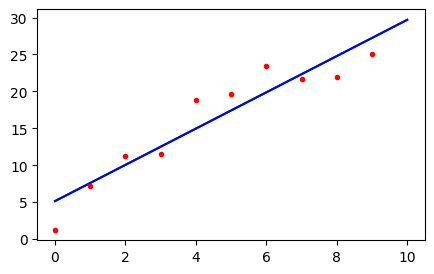

In [10]:
import regression
# find best fit line for data by matrix
# y = a+ bx
matrix_pred = regression.regression_analysis(test_data)
#visualize
fig = plt.figure(figsize=(5, 3))
ax = np.linspace(0, 10, 200)
plt.plot(ax, [matrix_pred(x) for x in ax], 'g', label="predicted")
plt.plot(ax, [a*x + b for x in ax], 'b', label="grad_predicted")
plt.plot(test_data, 'r.', label="real")

In [11]:
#compare predictions loss
squared_loss_matrix = lambda x: (matrix_pred(x) - test_data[x])**2
squared_loss_grad = lambda x: (a*x + b - test_data[x])**2
print(f"matrix loss: {sum(squared_loss_matrix(x) for x in range(10))}")
print(f"grad loss: {sum(squared_loss_grad(x) for x in range(10))}")

matrix loss: [64.31442029]
grad loss: 64.31515733915064
